# Установим необходимые библиотеки

### Последовательно нажимайте кнопку выполнить на каждом шаге ознакомившись с инструкцией

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 12.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0,>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


## Загрузка датасета вручную

\* Выполняйте следующий код ниже, только в случае если загружаете датасет в архиве zip вручную

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Вместо "/content/drive/MyDrive/folder_sorter/AIWDB_yolov8_sc.zip" укажите местоположение архива с датасетом

In [8]:
!unzip '/content/drive/MyDrive/Практика/HTX.v1i.yolov8.zip' -d '/content/HTX.v1i.yolov8'

Выходные данные были обрезаны до нескольких последних строк (5000).
 extracting: /content/HTX.v1i.yolov8/test/labels/Image157_png.rf.96088dff07d7a5105539e3e05a39d1a6.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image184_png.rf.a4d1063a8c7103e5b7efb8baa586cc7c.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image186_png.rf.8c36a3e47809d89e4ad196441db26de9.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image191_png.rf.03132583cf4cf719ffa2942b45aae5bc.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image221_png.rf.397bff7652e98ac47e7cfff3530ccfd7.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image224_png.rf.52efa662b08180750076181fda8820b9.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image227_png.rf.ab96cac3d4ab2cfe2b12032682e63046.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image255_png.rf.cee8a834e3beaa0f990d4af4be57e879.txt  
 extracting: /content/HTX.v1i.yolov8/test/labels/Image257_png.rf.47377389b37ddb2874c02bcb513d840a.tx

Идентифицируем конфигурационный файл

In [9]:
location = '/content/HTX.v1i.yolov8/data.yaml'

Запускаем обучение

In [13]:
!rm -r /content/yolov8s.pt

In [15]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data={location} \
epochs=40 \
batch=30 \
device=0

Ultralytics YOLOv8.2.50 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/HTX.v1i.yolov8/data.yaml, epochs=40, time=None, patience=100, batch=30, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

Сохраняем и скачиваем новые веса для замены старых

In [9]:
from ultralytics import YOLO
model = YOLO('/content/best.pt').to('cpu')

In [10]:
result = model.track('/content/ФотоМария.jpg')


image 1/1 /content/ФотоМария.jpg: 352x640 1 Clamp, 1 Drill, 4 Levels, 2 Plierss, 1 Ruler, 1 Scissors, 15 Screwdrivers, 331.7ms
Speed: 4.6ms preprocess, 331.7ms inference, 19.8ms postprocess per image at shape (1, 3, 352, 640)


In [11]:
list(result[0].names[k.item()] for k in result[0].boxes.cls)

['Screwdriver',
 'Pliers',
 'Screwdriver',
 'Pliers',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Scissors',
 'Screwdriver',
 'Screwdriver',
 'Screwdriver',
 'Ruler',
 'Drill',
 'Level',
 'Screwdriver',
 'Level',
 'Level',
 'Clamp',
 'Level',
 'Screwdriver']

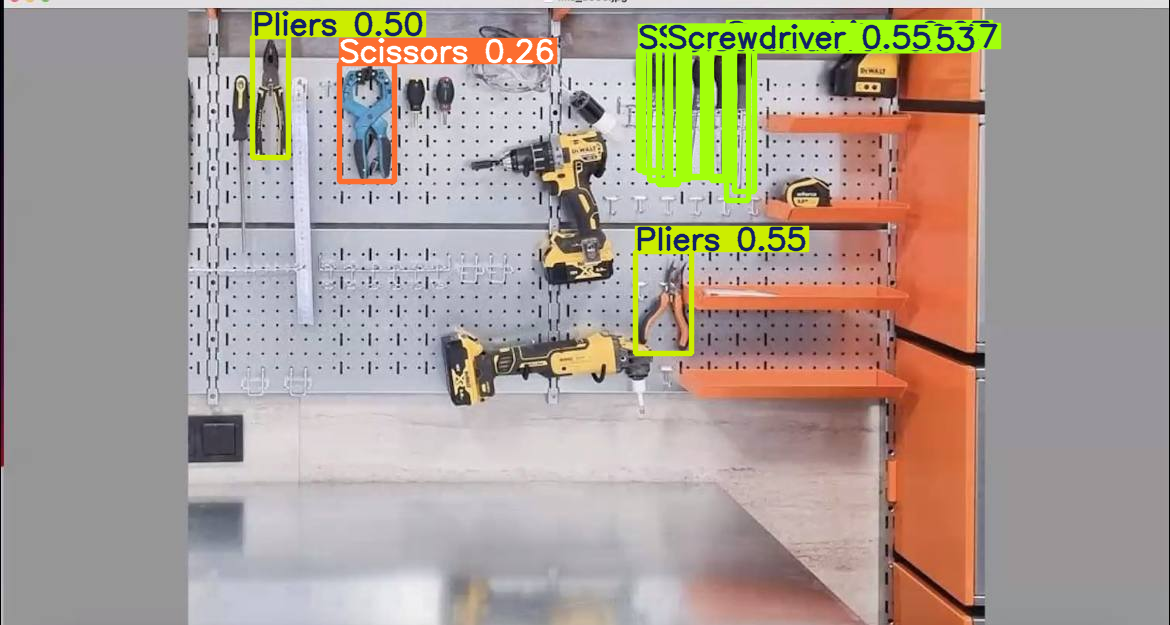

In [29]:
from PIL import Image
from google.colab.patches import cv2_imshow

im_array = result[0].plot()
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
cv2_imshow(im_array)